In [1]:
import sys
import os
import ruamel.yaml as yaml
sys.path.append("/home/ber0061/Repositories/surrDAMH")
from surrDAMH.modules import visualization_and_analysis as va
from surrDAMH.modules import analysis as ape
import matplotlib.pyplot as plt
import numpy as np

## Obligatory paths

In [2]:
conf_path = "config_mcmc_bayes.yaml"
path_to_data = "./saved_samples2"

# načtení dat a formatovani dat

In [3]:
### PREPARATION:
basename = os.path.basename(conf_path)
problem_name, fext = os.path.splitext(basename)

output_dir = os.path.join(path_to_data, problem_name)

with open(conf_path) as f:
    conf = yaml.safe_load(f)


observations = np.array(conf["problem_parameters"]["observations"])
no_parameters = conf["no_parameters"]

### LOAD DATA:
raw_data = ape.RawData()
raw_data.load(output_dir, no_parameters, len(observations))

raw data: no_stages 2
raw data: no_chains 19
raw data: no_samples 495114
raw data: no_nonconverging 0
raw data: p (495114, 8)
raw data: w (495114, 1)
raw_data: np.sum(weights): 490146


## Filtrovaní dat

In [4]:
# type: 0-accepted, 1-prerejected, 2-rejected
no_stages = len(conf["samplers_list"])
raw_data_filtered = raw_data.filter(types=[0,2], stages=range(no_stages+1))
# raw_data_accepted = raw_data.filter(types=[0], stages=range(0,no_stages+1))


filter raw data: p (24844, 8)


In [9]:
raw_data_filtered = raw_data.filter(types=[0,2], stages=[0])

filter raw data: p (6958, 8)


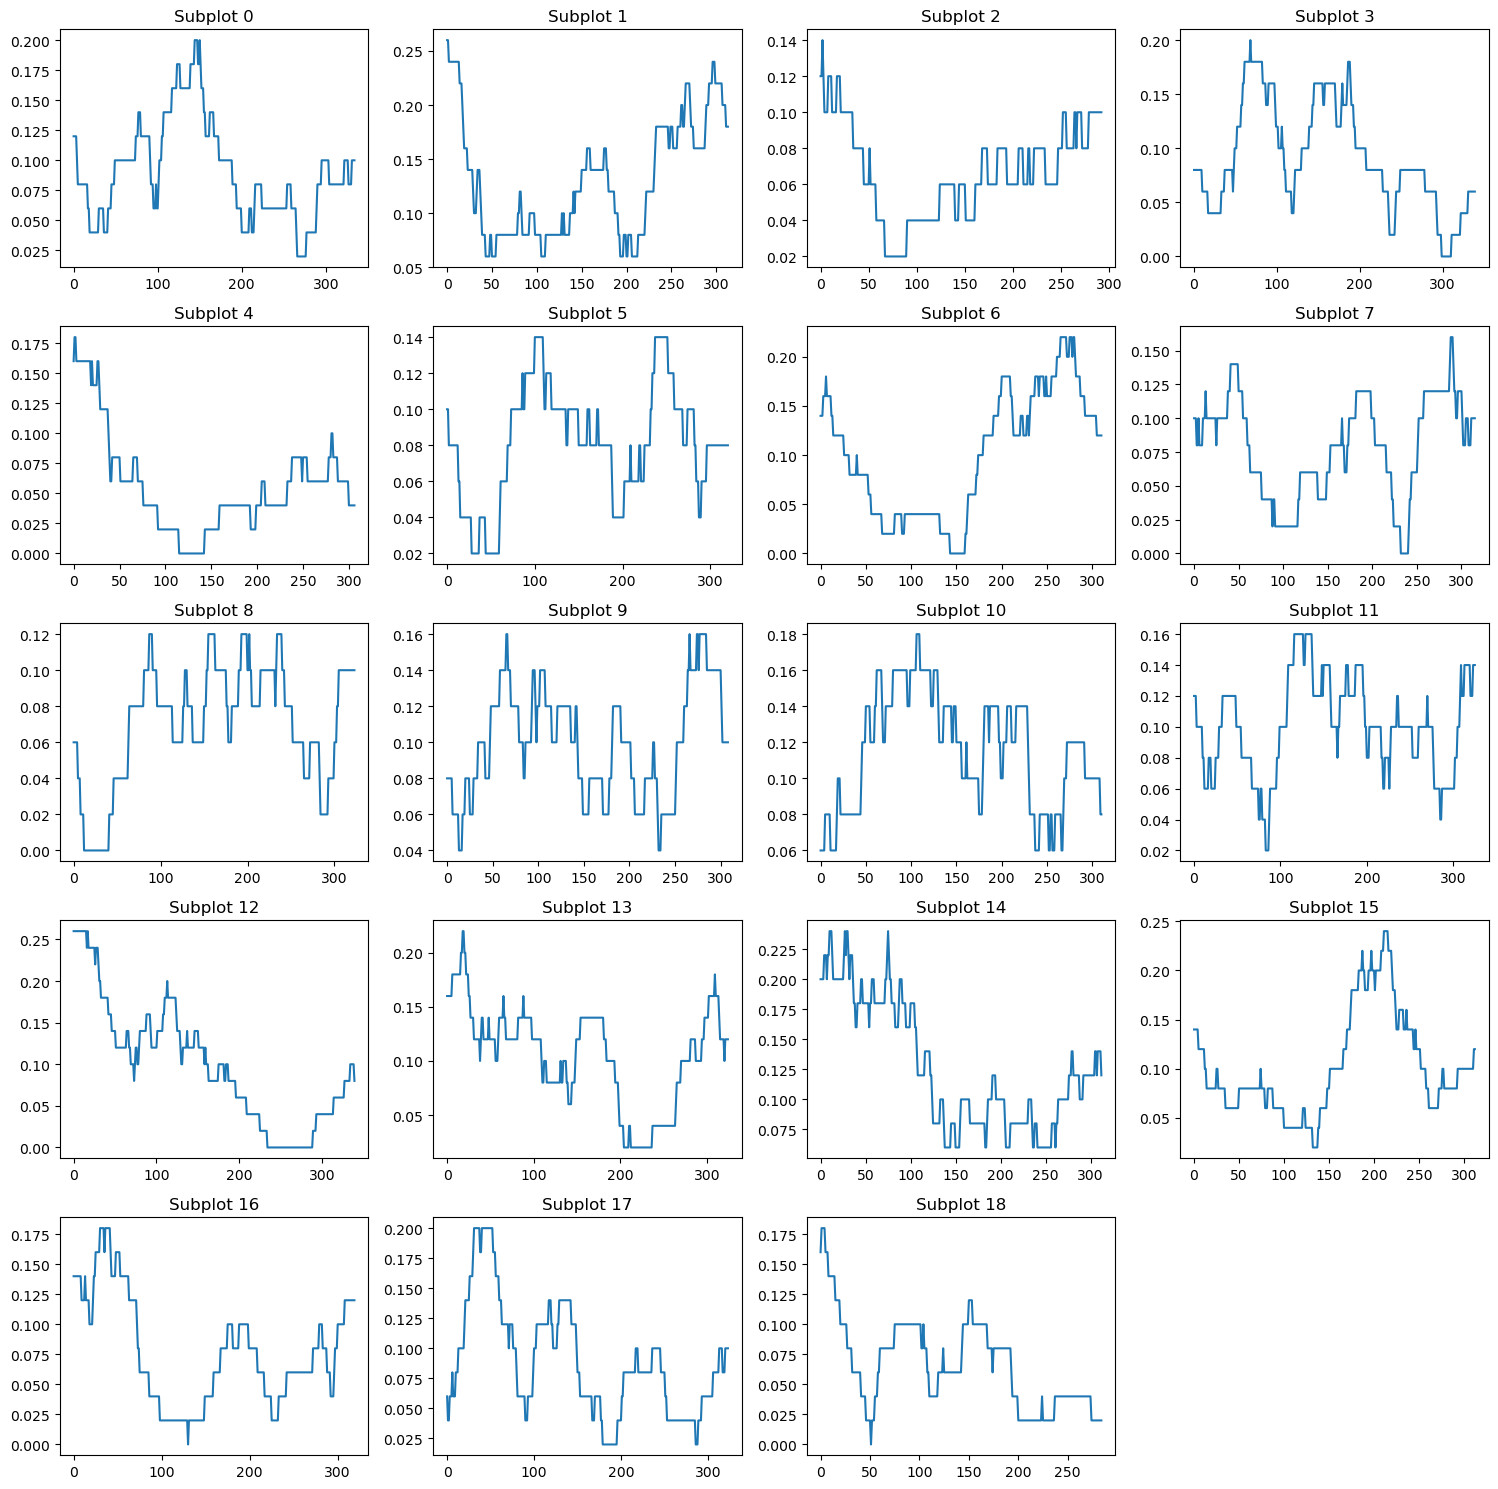

In [21]:

# Create a 5x4 grid of subplots
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

# Flatten axs for easy iteration
axs = axs.flatten()

for i in range(19):
    idx = raw_data_filtered.chains==i
    data = raw_data_filtered.types[idx]==0

    # Define the window size
    window_size = 50

    # Create a uniform window
    weights = np.ones(window_size) / window_size

    # Calculate the moving average
    moving_avg = np.convolve(data, weights, mode='valid')

    # Plot the moving average on the i-th subplot
    axs[i].plot(moving_avg)
    axs[i].set_title(f'Subplot {i}')

# Hide any unused subplots
for j in range(i+1, 20):
    axs[j].axis('off')

# Display the figure with subplots
plt.tight_layout()
plt.show()


filter raw data: p (17886, 8)


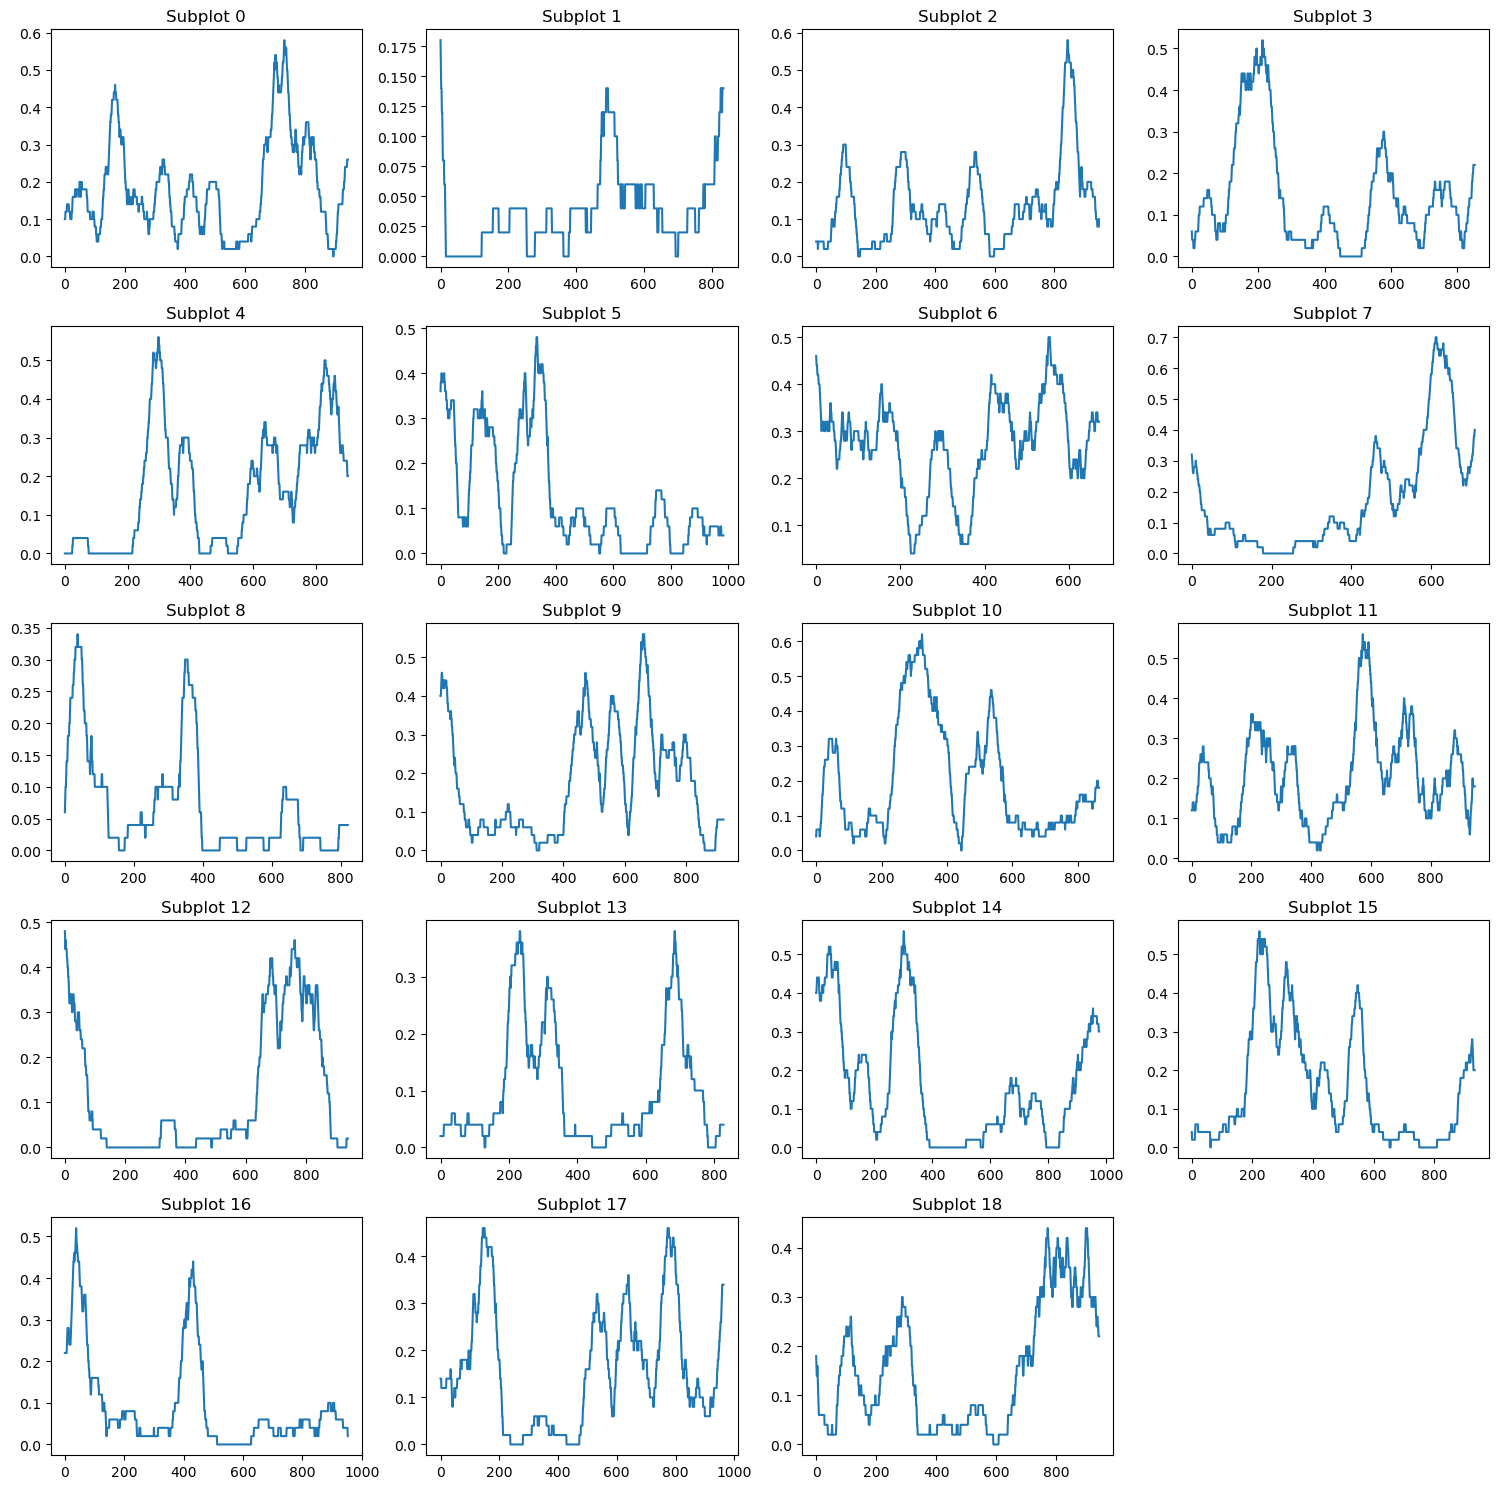

In [22]:
raw_data_filtered = raw_data.filter(types=[0,2], stages=[1])


# Create a 5x4 grid of subplots
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

# Flatten axs for easy iteration
axs = axs.flatten()

for i in range(19):
    idx = raw_data_filtered.chains==i
    data = raw_data_filtered.types[idx]==0

    # Define the window size
    window_size = 50

    # Create a uniform window
    weights = np.ones(window_size) / window_size

    # Calculate the moving average
    moving_avg = np.convolve(data, weights, mode='valid')

    # Plot the moving average on the i-th subplot
    axs[i].plot(moving_avg)
    axs[i].set_title(f'Subplot {i}')

# Hide any unused subplots
for j in range(i+1, 20):
    axs[j].axis('off')

# Display the figure with subplots
plt.tight_layout()
plt.show()
